# Step 1- Follow along with the tutorial to gain an understanding of the process



In [2]:
!pip install tensorflow-hub
!pip install tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.11.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


# **STEP-2 IMPORTING THE ORIGINAL MNIST DATASET AND REPRODUCING THE RESULTS**

In [4]:
original_mnist= tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = original_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**DATA EXPOLRATION**

In [5]:
print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


**There are 60000 images with shape 28x28**

In [6]:
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The labels are values from 0 to 9

In [9]:
test_images.shape

(10000, 28, 28)

The train set has 60000 images and test set contains 10000 images 

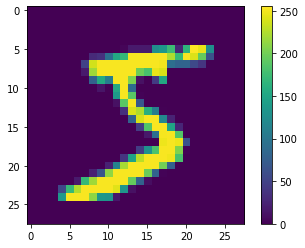

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Before feeding the images to the neural network model we need to covert them into grayscale by dividing them by the number of pixels.

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

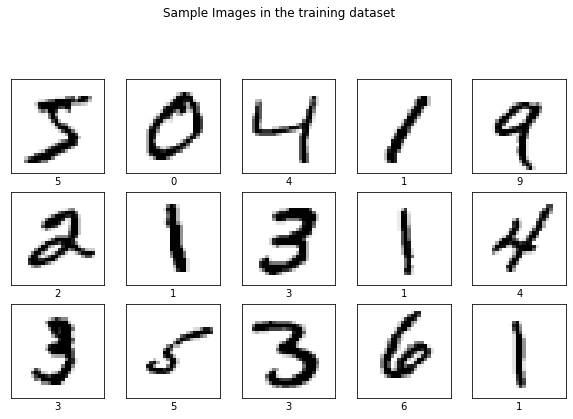

In [12]:
plt.figure(figsize = (10,10))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_labels[train_labels[i]])
    plt.suptitle("Sample Images in the training dataset")
plt.show()

In [13]:
#Build the model
model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                               tf.keras.layers.Dense(16, activation='relu'), 
                               tf.keras.layers.Dense(10)])
#compile the model
model_1.compile(optimizer = 'adam', 
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])

In [14]:
#Training the model
model_1.fit(train_images, train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4477 - accuracy: 0.8689
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2373 - accuracy: 0.9318
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2025 - accuracy: 0.9405
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1823 - accuracy: 0.9466
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1673 - accuracy: 0.9503
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1567 - accuracy: 0.9541
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1501 - accuracy: 0.9551
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1426 - accuracy: 0.9568
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9591
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.132

In [15]:
# Compute the testing accuracy
test_loss, test_accuracy = model_1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_accuracy)

313/313 - 1s - loss: 0.1596 - accuracy: 0.9528 - 537ms/epoch - 2ms/step

Test accuracy: 0.9527999758720398


The training accuracy and test accuracy can be seen from the above code


*  **Training accuracy is almost 96 %**
*  **Testing accuracy is almost 95 %** 



Performance of model for prediction of a sample of images

In [16]:
probability_model = tf.keras.Sequential([model_1, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [17]:
#0 represnts the number of the image(FIRST IMAGE IN TEST SET)
predictions[0]

array([1.5912043e-05, 6.6632975e-12, 1.7414460e-04, 6.3565313e-03,
       3.7745331e-11, 9.9741862e-07, 7.0266248e-14, 9.9344206e-01,
       5.4681063e-06, 4.9889577e-06], dtype=float32)

In [18]:
# First image in the test set is likely to have label named 7 (Label that has the highest prediction)
np.argmax(predictions[0])

7

In [19]:
#Checking the label of the image 
test_labels[0]

7

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label], 100*np.max(predictions_array), class_labels[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

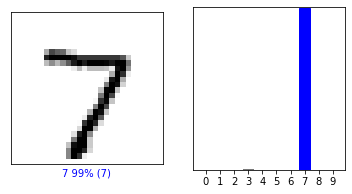

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

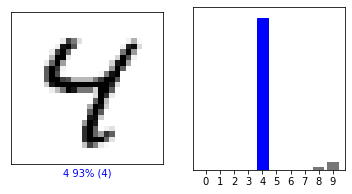

In [22]:
i=6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


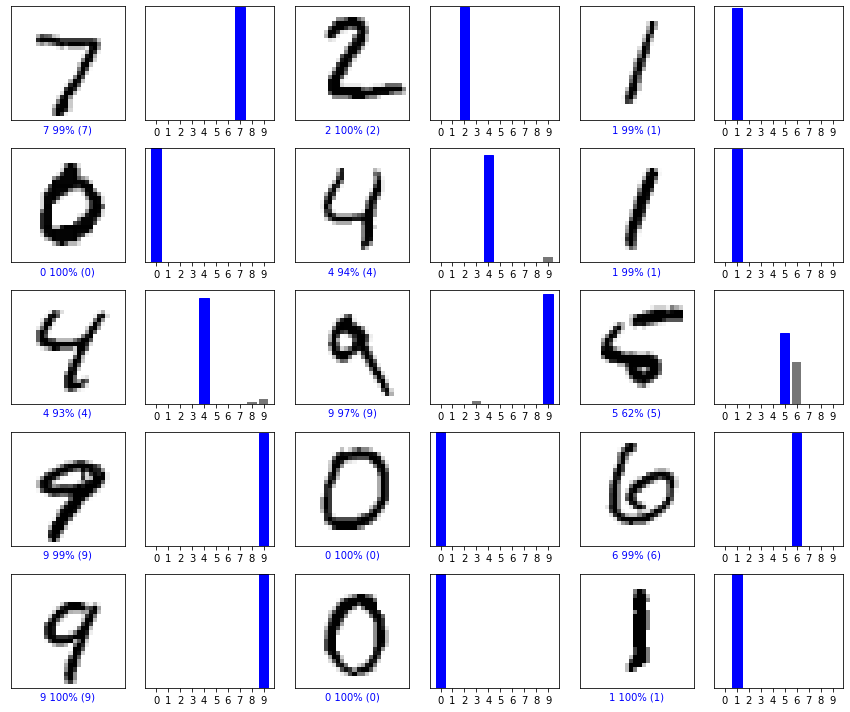

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
#Grabbing an image from the test dataset.
image = test_images[3]
print(image.shape)

(28, 28)


In [25]:
#Adding the image to a batch where it's the only member.
image = (np.expand_dims(image,0))
print(image.shape)

(1, 28, 28)


In [26]:
#Predicting the correct label for the image
predictions_single = probability_model.predict(image)
print(predictions_single)

1/1 [==============================] - 0s 34ms/step
[[9.9999869e-01 7.7484702e-15 2.5129398e-07 3.9320241e-08 1.3683727e-11
  2.2269328e-08 5.7780841e-07 9.6332124e-09 1.1457272e-09 3.0933489e-07]]


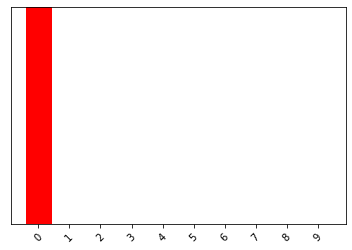

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_labels, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

0

# **STEP 3- RESULTS**


*   **The training accuracy is observed as 96 and the testing accuracy is 95** 
*   The model can be hypothesized by changing the layers,number of neurons , the optimizer and the activation function to achieve better accuracy



# **STEP 4 & STEP 5 - Adding another Dense layer of 128 nodes and changing the model based on the selected method**

In [29]:
#Build the model
model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_2.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_2.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3576 - accuracy: 0.8947
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1936 - accuracy: 0.9432
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1574 - accuracy: 0.9524
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9589
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1183 - accuracy: 0.9628
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9678
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0972 - accuracy: 0.9694
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9718
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0815 - accuracy: 0.9740
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.077

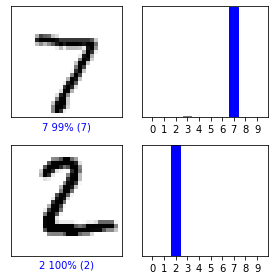

In [52]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 2
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

 # **STEP 6- Report on the results of the modified model** 

 MODEL 2 with extra Dense layer of 128 nodes and other values as model 1(epochs=10,optimiser=adam and the number of neurons in first layer is 16)

**RESULTS:** 


1.   Training accuracy is 97
2.   Training accuracy is 96

When the extra dense layer with 128 neurons is added we can see that the accuracy in both training and testing accuracy have increased.There is no overfitting because the training and testing accuracy almost have the same values.

# **STEP-7 Experiment with different optimizers, loss functions, dropout,  activation functions and observing the change in performance** 

Considering the added dense layer and changing the optimizers

Optimizer- RMSprop

In [31]:
#Build the model
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_3.compile(optimizer = 'RMSprop', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_3.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_3.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3596 - accuracy: 0.8958
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2047 - accuracy: 0.9401
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1699 - accuracy: 0.9492
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1488 - accuracy: 0.9550
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9605
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1256 - accuracy: 0.9622
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1169 - accuracy: 0.9653
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1104 - accuracy: 0.9672
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1058 - accuracy: 0.9697
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.101

The training and testing accuracy of model 3 (RMSprop optimizer) and other values same as model 2 is 96 and 96 respectively .

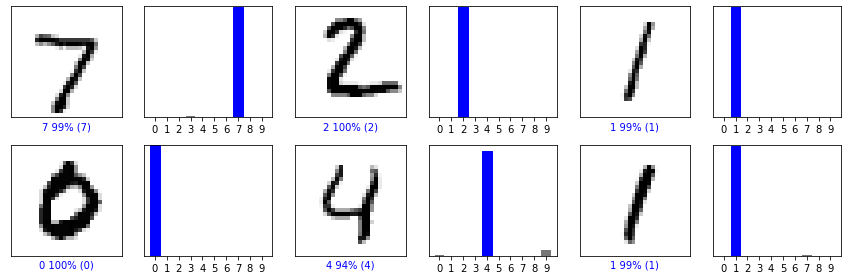

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 2
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

OPTIMIZER -ADAMAX

In [32]:
#Build the model
model_4 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_4.compile(optimizer = 'Adamax', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_4.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_4.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5703 - accuracy: 0.8335
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2788 - accuracy: 0.9193
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2383 - accuracy: 0.9310
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2132 - accuracy: 0.9382
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1965 - accuracy: 0.9429
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1829 - accuracy: 0.9462
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1720 - accuracy: 0.9495
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1638 - accuracy: 0.9519
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1560 - accuracy: 0.9542
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.149

The training and testing accuracy of model 4 (Adamax optimizer) is 96 and 95 respectively with other values as same as model 2 

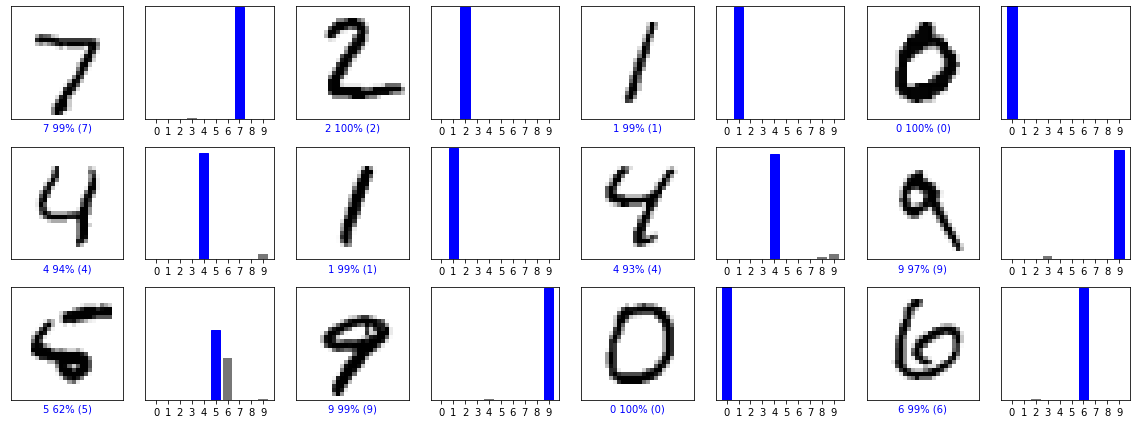

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

OPTIMIZER-SGD

In [33]:
#Build the model
model_5 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_5.compile(optimizer = 'SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_5.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_5.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8111 - accuracy: 0.7828
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3298 - accuracy: 0.9053
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.9181
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2499 - accuracy: 0.9276
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2281 - accuracy: 0.9336
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2099 - accuracy: 0.9393
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1962 - accuracy: 0.9431
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1847 - accuracy: 0.9462
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1752 - accuracy: 0.9491
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.167

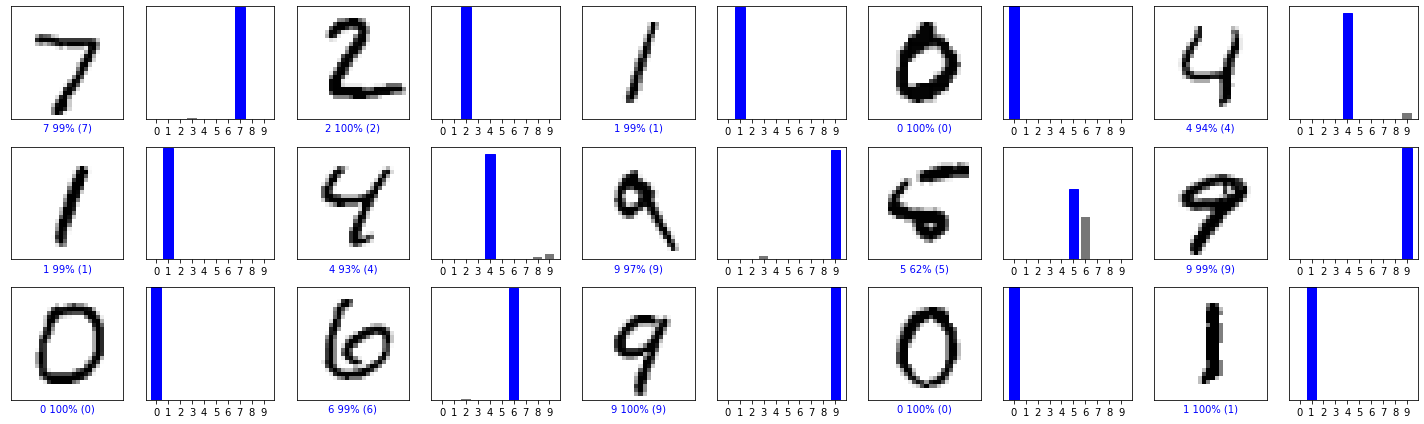

In [56]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The training and testing accuracy of model 5(SGD optimizer) is 94 and 94 respectively with other values as same as model 2 

**Model 2 with optimizer as adam gives the highest accuracy when compared to the other models**

Now changing the different activation functions and keeping other values same as model 2

ACTIVATION FUNCTION - elu

In [34]:
#Build the model
model_6 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='elu'),
                             tf.keras.layers.Dense(128, activation='elu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_6.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_6.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_6.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3577 - accuracy: 0.8953
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2065 - accuracy: 0.9384
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1606 - accuracy: 0.9532
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1361 - accuracy: 0.9581
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1191 - accuracy: 0.9634
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1061 - accuracy: 0.9675
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0985 - accuracy: 0.9695
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9713
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0849 - accuracy: 0.9731
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.078

The training and testing accuracy of model 6(activation fucntion- elu) is 97 and 96 respectively with other values as same as model 2 

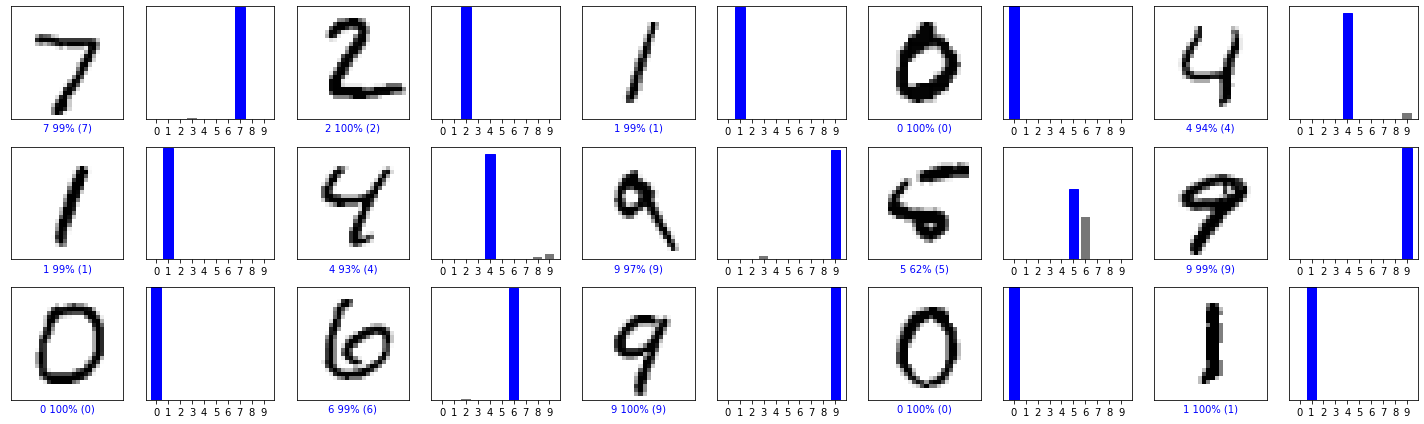

In [57]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

ACTIVATION FUNCTION -SELU

In [35]:
#Build the model
model_7 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='selu'),
                             tf.keras.layers.Dense(128, activation='selu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_7.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_7.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_7.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3528 - accuracy: 0.8972
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2052 - accuracy: 0.9398
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1653 - accuracy: 0.9505
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9577
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1271 - accuracy: 0.9607
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1152 - accuracy: 0.9646
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9671
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9688
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0914 - accuracy: 0.9707
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.086

The training and testing accuracy of model 7(activation fucntion- selu) is 97 and 96 respectively with other values as same as model 2 :

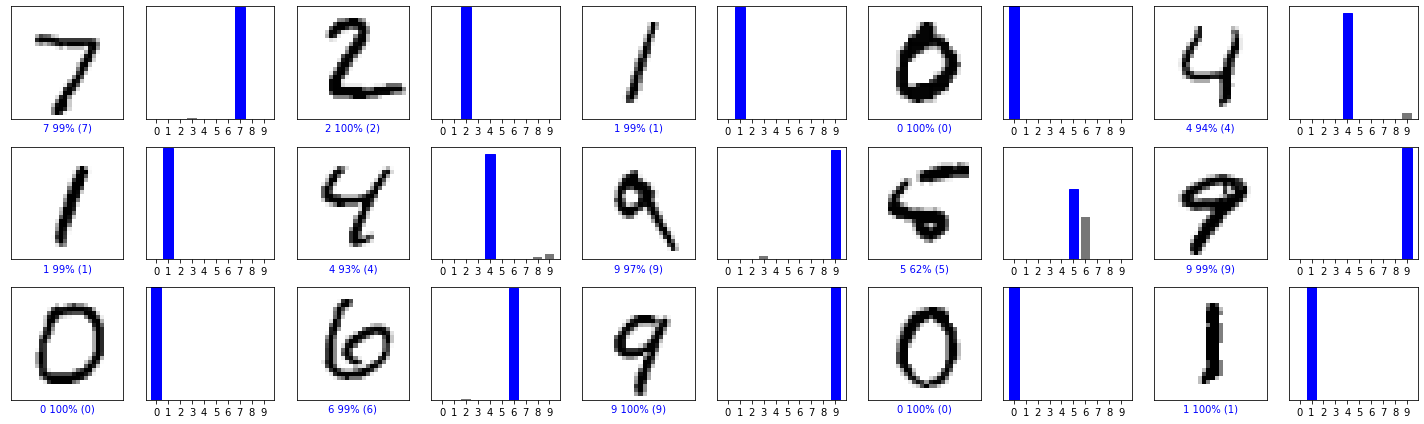

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

ACTIVATION FUCNTION - gelu

In [36]:
#Build the model
model_8 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='gelu'),
                             tf.keras.layers.Dense(128, activation='gelu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_8.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_8.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_8.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3483 - accuracy: 0.8991
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1842 - accuracy: 0.9461
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1449 - accuracy: 0.9562
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1238 - accuracy: 0.9625
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1102 - accuracy: 0.9661
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0989 - accuracy: 0.9687
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0896 - accuracy: 0.9718
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0834 - accuracy: 0.9739
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0763 - accuracy: 0.9755
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.071

The training and testing accuracy of model 8(activation fucntion- gelu) is 97 and 96 respectively with other values as same as model 2 

**Model 8(gelu and adam) performs better because it has a good training accuracy than the model 2.**

So keping the optimizer as adam and activation function as gelu changing the number of epochs

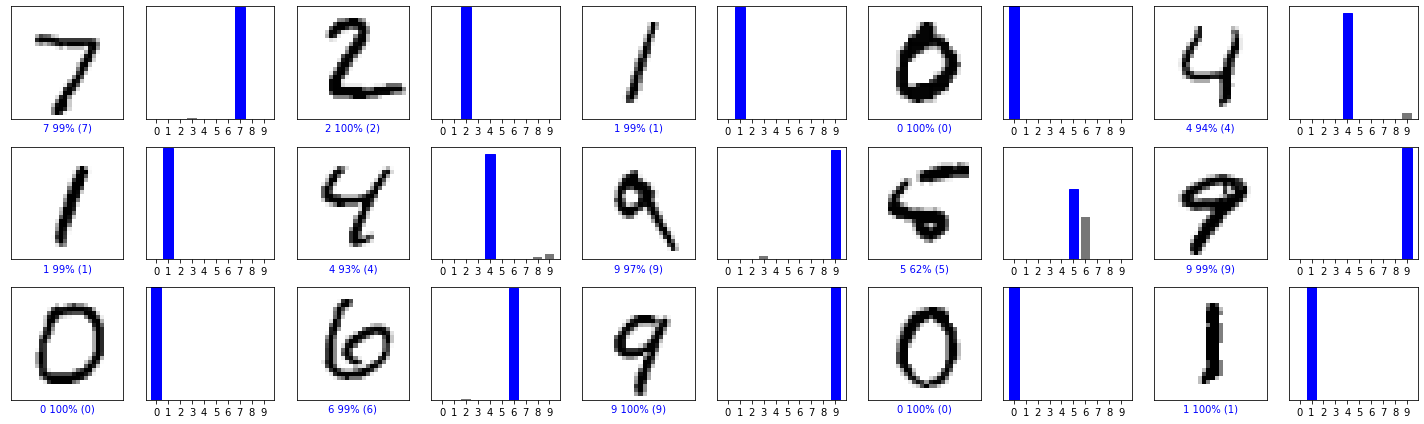

In [59]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Epochs=20

In [37]:
#Build the model
model_9 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='gelu'),
                             tf.keras.layers.Dense(128, activation='gelu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_9.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_9.fit(train_images, train_labels,epochs=20)

#Finding the test set accuracy
test_loss, test_accuracy = model_9.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3561 - accuracy: 0.8953
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1906 - accuracy: 0.9438
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1486 - accuracy: 0.9549
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1253 - accuracy: 0.9619
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1110 - accuracy: 0.9656
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9692
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0929 - accuracy: 0.9703
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9737
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0793 - accuracy: 0.9755
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.074

The training and testing accuracy of model 9(Epochs=20) is 98 and 96 respectively with other values as same as model 8

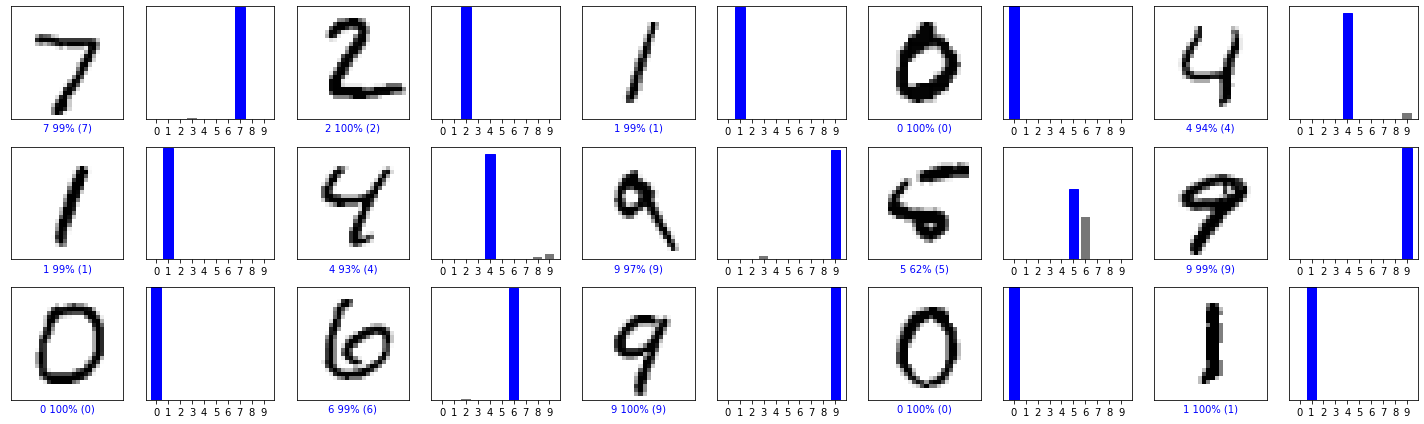

In [60]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

EPOCHS=30

In [ ]:
#Build the model
model_10 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='gelu'),
                             tf.keras.layers.Dense(128, activation='gelu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_10.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_10.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_10.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/30
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3595 - accuracy: 0.8951
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1988 - accuracy: 0.9414
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1558 - accuracy: 0.9527
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9600
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9658
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9676
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0912 - accuracy: 0.9714
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9736
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9749
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.072

The training and testing accuracy of model 10(Epochs=30) is 98 and 96 respectively with other values as same as model 8

We can see that the testing accuracy and training accuracy have a difference and this difference may be because the model is overfitting


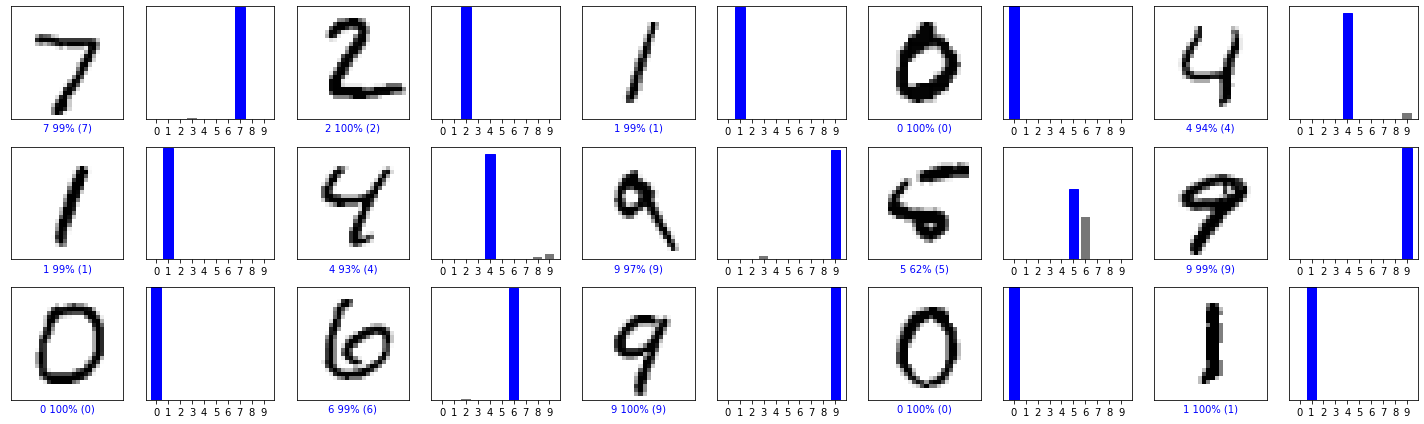

In [61]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Epochs=25

In [39]:
#Build the model
model_11 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='gelu'),
                             tf.keras.layers.Dense(128, activation='gelu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_11.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_11.fit(train_images, train_labels,epochs=25)

#Finding the test set accuracy
test_loss, test_accuracy = model_11.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3589 - accuracy: 0.8945
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.9427
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1508 - accuracy: 0.9539
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1267 - accuracy: 0.9611
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1108 - accuracy: 0.9650
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0989 - accuracy: 0.9690
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9715
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0833 - accuracy: 0.9738
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9754
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.071

The training and testing accuracy of model 11(Epochs=30) is 98 and 96 respectively with other values as same as model 8

# **STEP 6- RESULTS AFTER ADDING THE EXTRA DENSE LAYER OF 128 NODES**

* **Model 10(gelu,adam,epochs=30) performs better because it has a good training accuracy than the other model and doesn not overfit.**
* **Model 10 has training accuracy of 98% and testing accuracy of 96%**

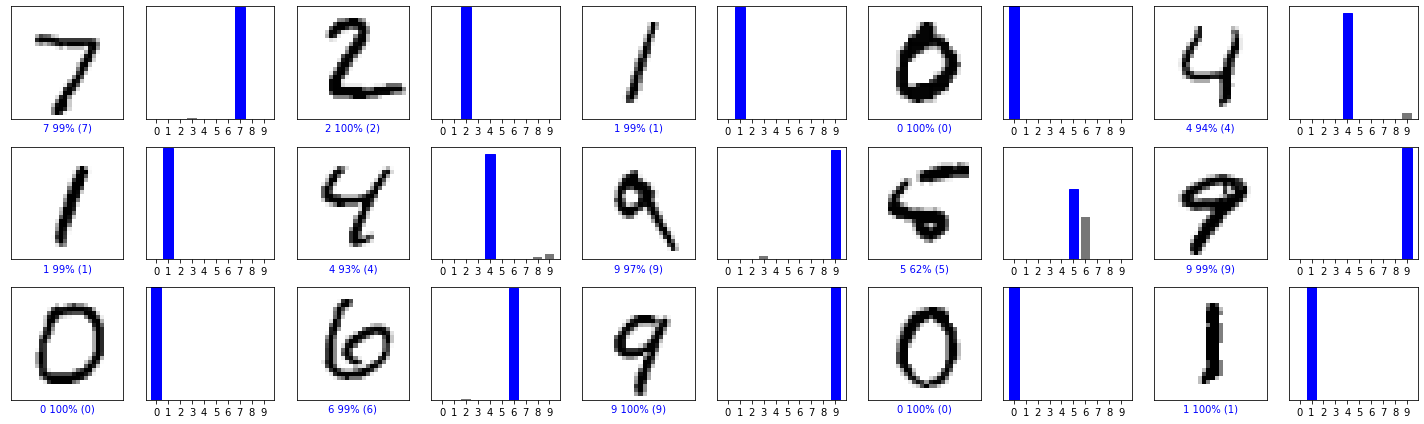

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# STEP 4 and STEP 5 -Increasing the current number of nodes in the layer to 256

In [40]:
#Build the model
model_12 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='gelu'),
                             tf.keras.layers.Dense(256, activation='gelu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_12.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_12.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_12.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3447 - accuracy: 0.8979
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1832 - accuracy: 0.9453
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1427 - accuracy: 0.9570
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9633
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1012 - accuracy: 0.9682
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9723
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0796 - accuracy: 0.9750
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9771
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9787
Epoch 10/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.060

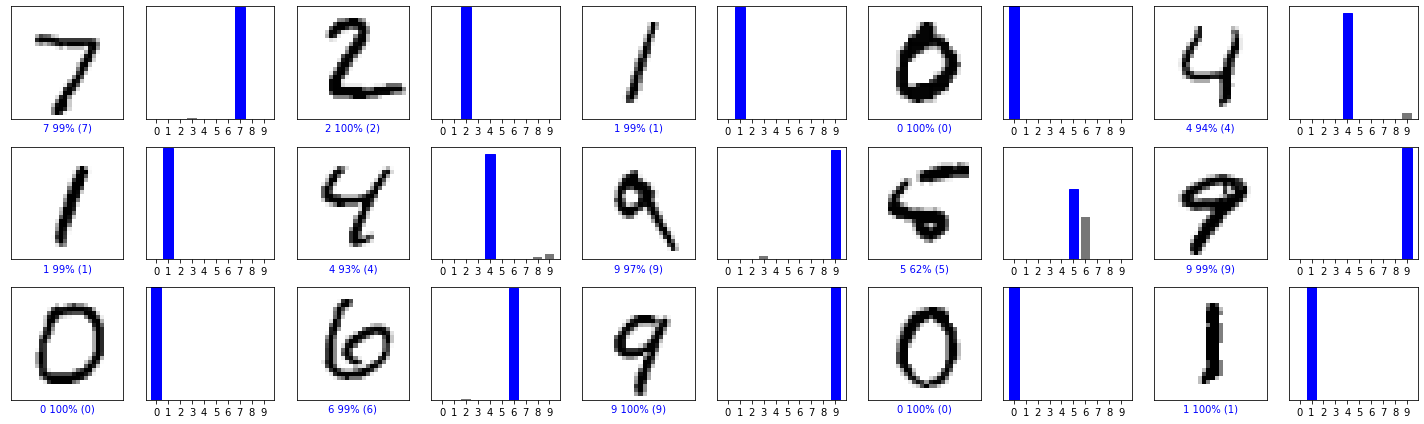

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# STEP 6- Report on the results of the modified model

MODEL 12 is built with 256 neurons instead of 128 which was in the model 11. 

RESULTS:

Training accuracy is 99
Training accuracy is 96

The training and testing accuracy of model 12 (NUMBER OF NEURONS=256) is 99 and 96 respectively with other values as same as model 10.This model might be overfitting. But we can see that the accuracy in both training and testing accuracy have increased.

# STEP 7- Experiment with different optimizers, loss functions, dropout,  activation functions and observe the change in performance as you tune these hyper parameters.

Trying different activation function to see if the model doesnt overfit

Activation function - relu

In [41]:
#Build the model
model_13 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_13.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_13.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_13.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3360 - accuracy: 0.8996
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1721 - accuracy: 0.9477
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1376 - accuracy: 0.9578
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1169 - accuracy: 0.9653
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1023 - accuracy: 0.9681
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0914 - accuracy: 0.9713
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9741
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0771 - accuracy: 0.9755
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.9772
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.066

The training and testing accuracy of model 13(activation function -relu) is 99 and 96 respectively with other values as same as model 12

Activation function -elu

In [42]:
#Build the model
model_14 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='elu'),
                             tf.keras.layers.Dense(256, activation='elu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_14.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_14.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_14.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3450 - accuracy: 0.8984
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2101 - accuracy: 0.9375
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1669 - accuracy: 0.9496
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9567
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1254 - accuracy: 0.9616
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1126 - accuracy: 0.9661
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1034 - accuracy: 0.9682
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0950 - accuracy: 0.9701
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9727
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.082

The training and testing accuracy of model 14 (activation function -elu) is 99 and 96 respectively with other values as same as model 12

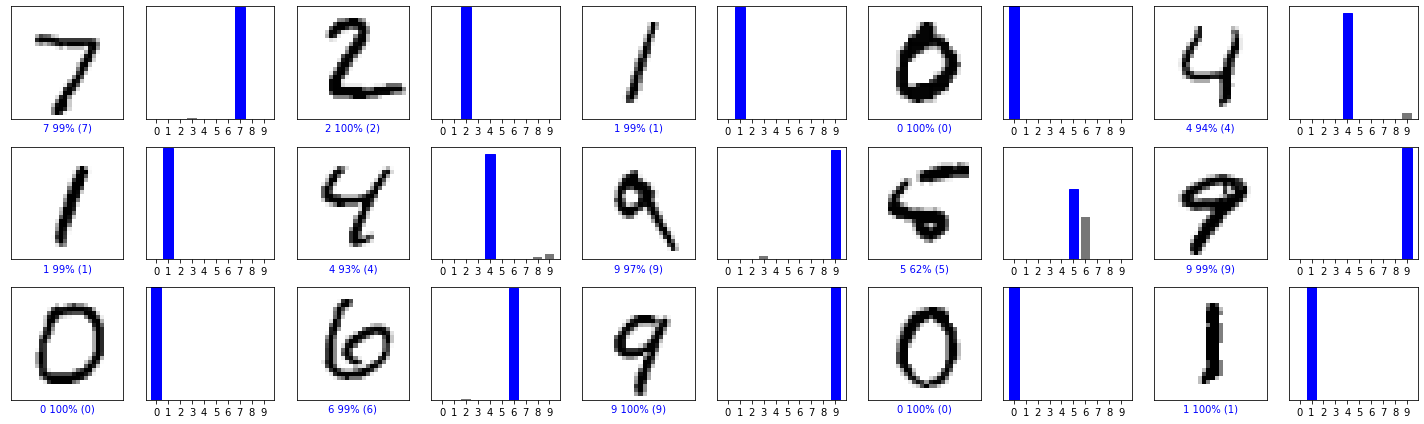

In [64]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Activation function -selu

In [ ]:
#Build the model
model_15= tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='selu'),
                             tf.keras.layers.Dense(256, activation='selu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_15.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_15.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_15.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

The training and testing accuracy of model 15(activation function -selu) is 98 and 96 respectively with other values as same as model 12

Model 13(relu) has the highest accuracy among all other activation function

Changing the optimizers and keeping other values same as model 13

Optimizer - adamax

In [44]:
#Build the model
model_16= tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_16.compile(optimizer = 'adamax', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_16.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_16.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4991 - accuracy: 0.8581
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9223
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2288 - accuracy: 0.9330
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2031 - accuracy: 0.9403
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1851 - accuracy: 0.9460
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1707 - accuracy: 0.9502
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1579 - accuracy: 0.9540
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1478 - accuracy: 0.9563
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1396 - accuracy: 0.9590
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.132

The training and testing accuracy of model 16(adamax) is 98 and 96 respectively with other values as same as model 13

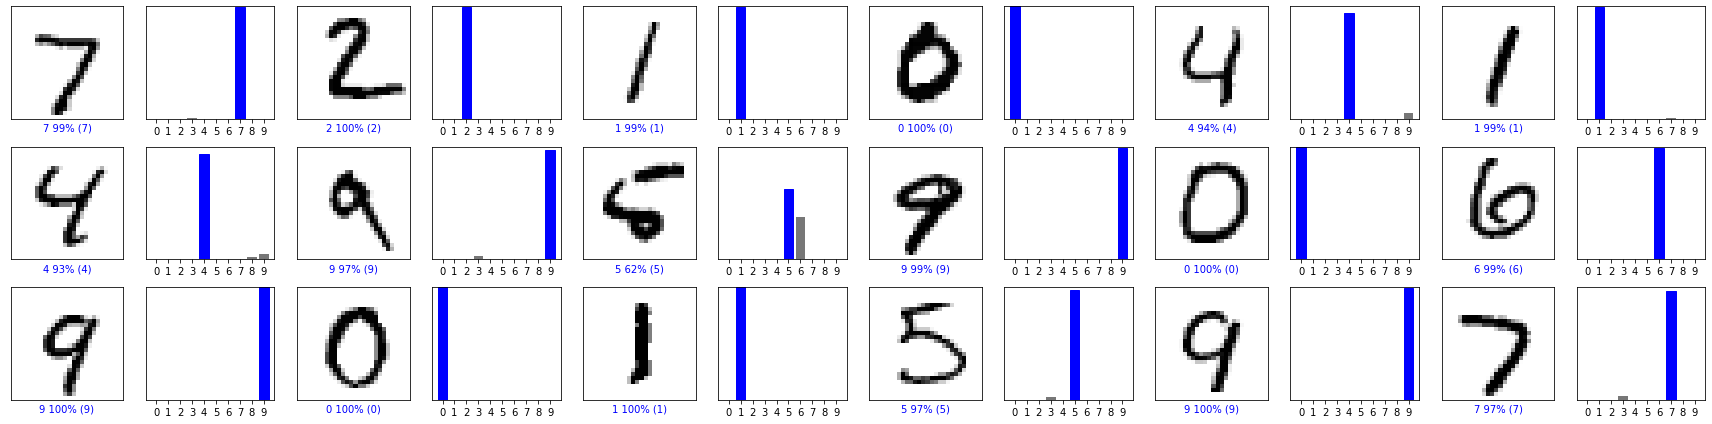

In [65]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Optimiser- RMSprop

In [ ]:
#Build the model
model_17= tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_17.compile(optimizer = 'RMSprop', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_17.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_17.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

The training and testing accuracy of model 17(RMSprop) is 97 and 96 respectively with other values as same as model 13

In [ ]:
#Build the model
model_18= tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_18.compile(optimizer = 'SGD', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_18.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_18.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

The training and testing accuracy of model 18(SGD) is 97 and 96 respectively with other values as same as model 13

In [47]:
#Build the model
model_19 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_19.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_19.fit(train_images, train_labels,epochs=30)

#Finding the test set accuracy
test_loss, test_accuracy = model_19.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3556 - accuracy: 0.8928
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1895 - accuracy: 0.9439
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1513 - accuracy: 0.9537
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9604
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1126 - accuracy: 0.9648
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1006 - accuracy: 0.9688
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - accuracy: 0.9726
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9732
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9761
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.071

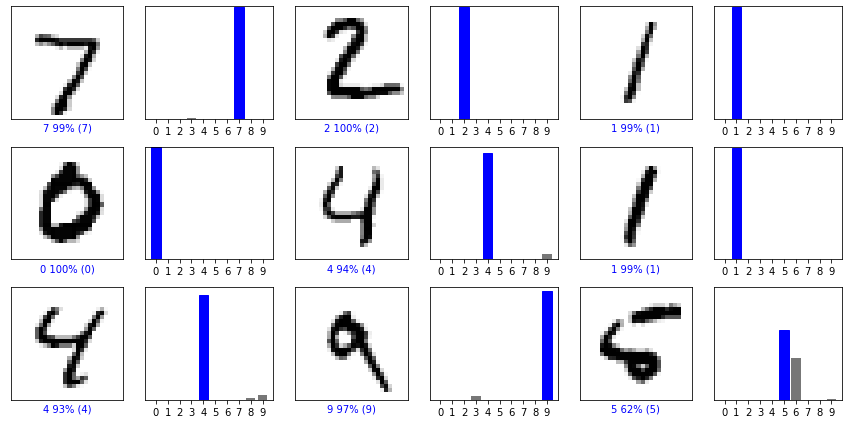

In [66]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The training and testing accuracy of model 19(Adam) is 99 and 96 respectively with other values as same as model 13 and the model seems to be overfitting

Model 13 performed well with higher accuracy where the activation function is relu,optimizer is adam and the number of neurons in the layer=256

Changing the epochs value epoch= 10

In [ ]:
#Build the model
model_20 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_20.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_20.fit(train_images, train_labels,epochs=10)

#Finding the test set accuracy
test_loss, test_accuracy = model_20.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

The training and testing accuracy of model 20(epoch =10) is 97 and 96 respectively with other values as same as model 13 

Epochs=20

In [ ]:
#Build the model
model_21 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_21.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_21.fit(train_images, train_labels,epochs=20)

#Finding the test set accuracy
test_loss, test_accuracy = model_21.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

The training and testing accuracy of model 21(epoch =20) is 98 and 96 respectively with other values as same as model 13 

Epochs =25

In [50]:
#Build the model
model_22 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(10)])
#compile the model
model_22.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model_22.fit(train_images, train_labels,epochs=25)

#Finding the test set accuracy
test_loss, test_accuracy = model_22.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3448 - accuracy: 0.8975
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1791 - accuracy: 0.9467
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1416 - accuracy: 0.9570
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1198 - accuracy: 0.9635
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.9666
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0961 - accuracy: 0.9702
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9722
Epoch 8/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0822 - accuracy: 0.9746
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9759
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.070

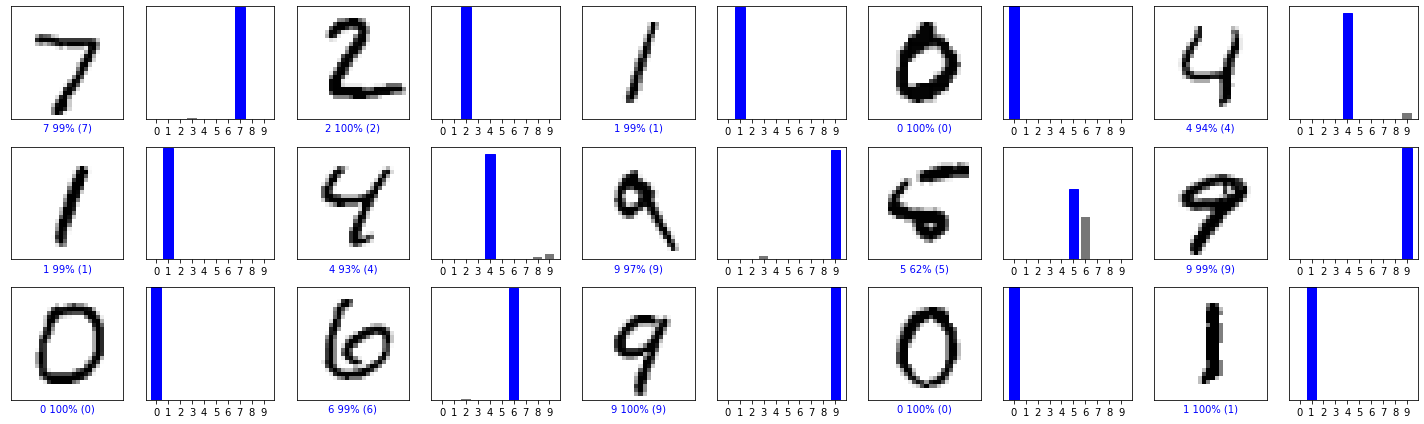

In [67]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The training and testing accuracy of model 22(epoch =25) is 98 and 96 respectively with other values as same as model 13 

# STEP 6- Report on the results of the modified model and if it matches your hypothesis


**FOR THE MODEL WHICH HAD THE SAME VALUES AS THE DEMO** 
MODEL 1 -The training and testing accuracy are 96 and 95 respectively.

**FOR THE FIRST PROPOSED MODEL WHERE WE ADDED A DENSE LAYER WITH 128 NODES** 
*   Few models gave training accuracy as 98 but testing accuracy is less
*   Model 10 with activation function-gelu,Optimizer- adam, epochs=30 gave the best training and testing accuracy

**FOR THE SECOND PROPOSED MODEL WHERE THE NUMBER OF NODES WERE CHANGED TO 256 NODES** 
*   Few models gave training accuracy as 99 but the testing accuracy is less which shows the sign that model is overfitting
*   Model 22 gives the best training and testing accuracy and the chances of model overfitting is less


